# 挖掘文本中的 URL 特征

In [18]:
import pandas as pd
data = pd.read_csv("./train.csv")

text = data["text"]



In [19]:
import re
def get_urls(text:str):
    pattern = re.compile(r"http\S+")
    urls = pattern.findall(text)
    return urls

In [20]:
data["urls"] = data["text"].apply(get_urls)

# count how many links have been appeared totally
total_count = 0
for url in data["urls"]:
    total_count += len(url)
total_count

4721

In [21]:
# draw a bar chart, indicating how many times each url appears

# Path: data-digging\Fin.Twitter\features.ipynb
import matplotlib.pyplot as plt

def count_urls(urls):
    url_counter = {}
    for url_list in urls:
        for url in url_list:
            if url in url_counter:
                url_counter[url] += 1
            else:
                url_counter[url] = 1

    url_counter = dict(sorted(url_counter.items(), key=lambda item: item[1], reverse=True))
    return url_counter


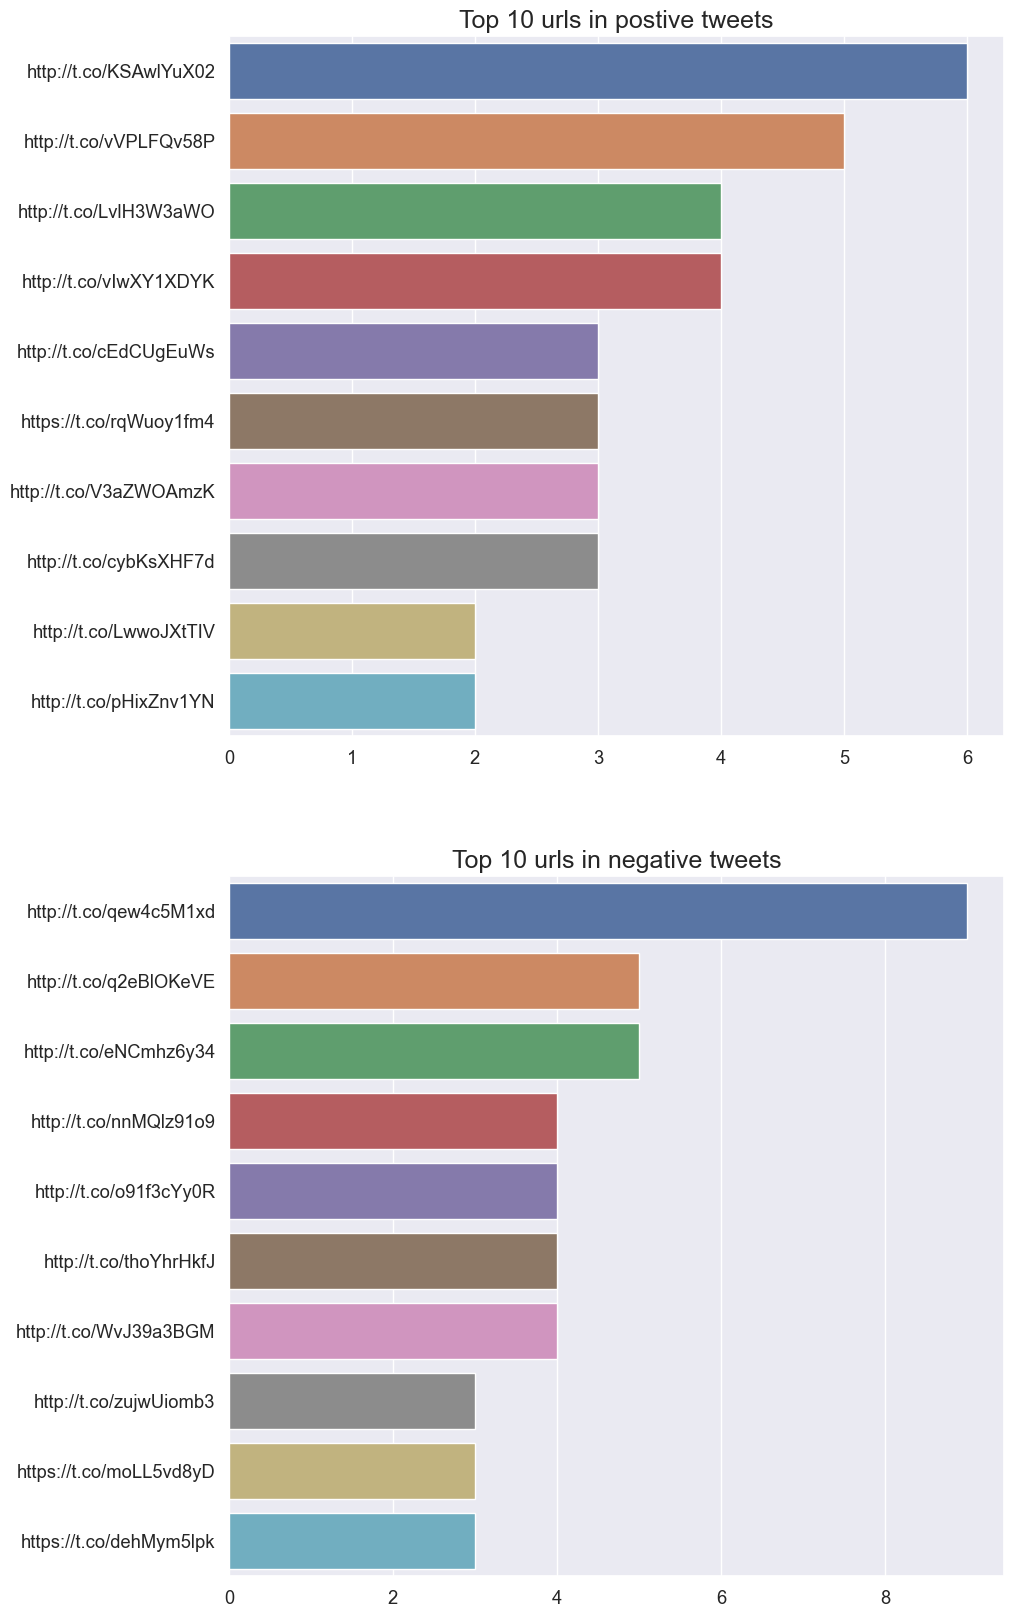

In [40]:

urls_postive = data[data["target"]==1]["urls"]
url_counter_postive = count_urls(urls=urls_postive)
urls_negative = data[data["target"]==0]["urls"]
url_counter_negative = count_urls(urls=urls_negative)

import seaborn as sns

# draw two bar charts into one figure
fig, axes = plt.subplots(2, 1, figsize=(10, 20))

# scale yaxis font
sns.set(font_scale=1.5)
# do let them dense


sns.barplot(y=list(url_counter_postive.keys())[:10], x=list(url_counter_postive.values())[:10], ax=axes[0])
sns.barplot(y=list(url_counter_negative.keys())[:10], x=list(url_counter_negative.values())[:10], ax=axes[1])

axes[0].set_title("Top 10 urls in postive tweets")

axes[1].set_title("Top 10 urls in negative tweets")


plt.show()



In [23]:
def get_mentions(text:str):
    pattern = re.compile(r"@\S+")
    mentions = pattern.findall(text)
    return mentions

data["mentions"] = data["text"].apply(get_mentions)


{'@YouTube': 17, '@FoxNews': 8, '@POTUS': 6, '@USAgov': 5, '@Change': 4, '@AP': 4, '@unsuckdcmetro': 4, '@ViralSpell': 3, '@usatoday': 3, '@Michael5SOS': 3, '@KurtSchlichter': 3, '@sharethis': 3, '@Reuters': 3, '@smh': 3, '@TfLBusAlerts': 3, '@MNPDNashville': 3, '@NASAHurricane': 3, '@ABC': 2, '@CDCgov': 2, '@NBCNews': 2, '@ameenshaikh3': 2, '@themagickidraps': 2, '@_minimehh': 2, '@cjoyner': 2, '@fewmoretweets': 2, '@JamaicaObserver': 2, '@cnewslive': 2, '@peterjukes': 2, '@newyorker': 2, '@guardian': 2, '@wordpressdotcom': 2, '@pmharper': 2, '@gofundme': 2, '@Newz_Sacramento': 2, '@9NewsGoldCoast': 2, '@YahooNews': 2, '@weathernetwork': 2, '@LondonFire': 2, '@slate': 2, '@YoungHeroesID': 2, '@samanthaturne19': 2, '@RoyalCarribean': 2, '@nytimes': 2, '@BLutz10': 2, '@LivingSafely:': 2, '@aria_ahrary': 2, '@TheTawniest': 2, '@wocowae': 2, '@bbcmtd': 1, '@Navista7': 1, '@News24680': 1, '@nxwestmidlands': 1, '@2:09': 1, '@Your4State.': 1, '@NorwayMFA': 1, '@AlexAllTimeLow': 1, '@20skyhaw

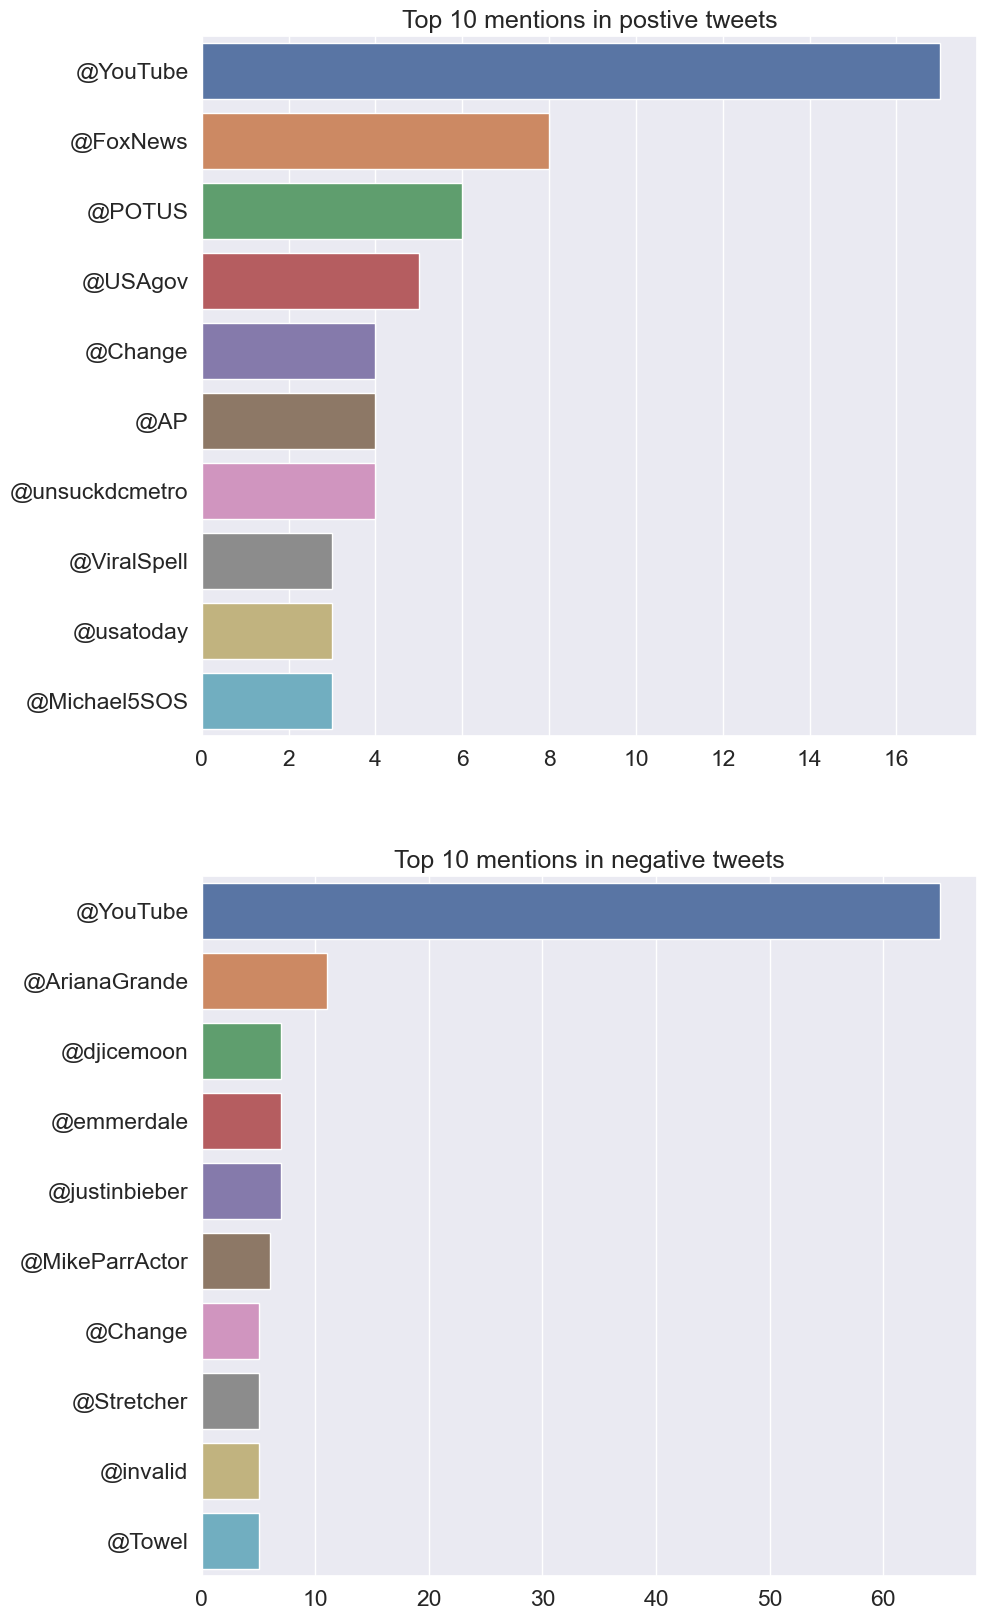

In [42]:

count_mentions_postive = count_urls(data[data["target"]==1]["mentions"])
count_mentions_negative = count_urls(data[data["target"]==0]["mentions"])
print(count_mentions_postive)
print(count_mentions_negative)

# draw two bar charts into one figure
fig, axes = plt.subplots(2, 1, figsize=(10, 20))

sns.barplot(y=list(count_mentions_postive.keys())[:10], x=list(count_mentions_postive.values())[:10], ax=axes[0])
sns.barplot(y=list(count_mentions_negative.keys())[:10], x=list(count_mentions_negative.values())[:10], ax=axes[1])

axes[0].set_title("Top 10 mentions in postive tweets")
axes[1].set_title("Top 10 mentions in negative tweets")


plt.show()


测试：画两张图